In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [124]:
train = pd.read_csv('/content/drive/MyDrive/ExcelR/Assignments/Titanic_train.csv',index_col=0)
test = pd.read_csv('/content/drive/MyDrive/ExcelR/Assignments/Titanic_test.csv',index_col=0)

In [125]:
print(train.shape)
print(test.shape)

(891, 11)
(418, 10)


In [126]:
test_ids = test.index.copy()

In [127]:
y = train['Survived'].copy()
train_features = train.drop(columns=['Survived'])

In [128]:
combined = pd.concat([train_features, test], axis=0, sort=False)
# Concatenate training and test features for consistent cleaning and feature engineering

In [129]:
combined.shape

(1309, 10)

In [130]:
combined.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [131]:
combined['Title'] = combined['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
combined['Title'] = combined['Title'].replace({'Mlle':'Miss','Ms':'Miss','Mme':'Mrs'})
# Extract the Title from the 'Name' feature using a regular expression

In [91]:
title_counts = combined['Title'].value_counts()
title_counts

,count
Title,
Mr,757
Miss,264
Mrs,198
Master,61
Rev,8
Dr,8
Col,4
Major,2
Don,1


In [132]:
rare_titles = title_counts[title_counts < 10].index
combined['Title'] = combined['Title'].replace(rare_titles, 'Rare')

In [133]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [134]:
combined['FamilySize'] = combined['SibSp'] + combined['Parch'] + 1
combined['IsAlone'] = (combined['FamilySize'] == 1).astype(int)
 # Create FamilySize by summing SibSp (siblings/spouses) and Parch (parents/children), plus the passenger themselves

In [135]:
if combined['Embarked'].isna().any():
    combined['Embarked'].fillna(train_features['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-1714551647.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined['Embarked'].fillna(train_features['Embarked'].mode()[0], inplace=True)


In [136]:
if combined['Fare'].isna().any():
    combined['Fare'].fillna(train_features['Fare'].median(), inplace=True)

/tmp/ipython-input-2244906768.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined['Fare'].fillna(train_features['Fare'].median(), inplace=True)


In [137]:
combined['Age'] = combined.groupby('Title')['Age'].transform(lambda grp: grp.fillna(grp.median()))
combined['Age'].fillna(train_features['Age'].median(), inplace=True)

/tmp/ipython-input-3439468706.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined['Age'].fillna(train_features['Age'].median(), inplace=True)


<Axes: >

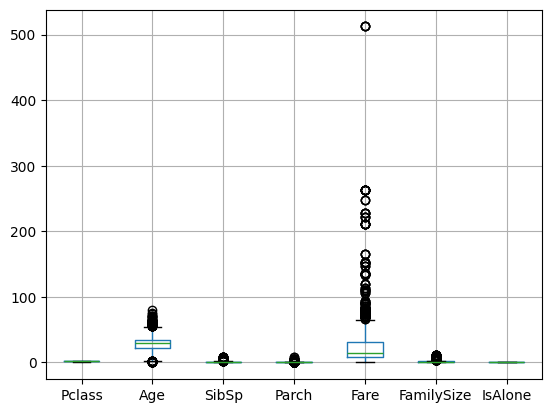

In [138]:
combined.boxplot()

In [139]:
def outliers(data):
  data_num = data.select_dtypes(include = 'number')

  for col in data_num:
      q1 = data[col].quantile(0.25)
      q3 = data[col].quantile(0.75)

      IQR = q3-q1
      lower_bound = q1 - 1.5*IQR
      upper_bound = q3 + 1.5*IQR

      data[col] = np.where(data[col] < lower_bound, lower_bound,
                      np.where(data[col] > upper_bound, upper_bound, data[col]))

  return data

In [140]:
combined = outliers(combined)

<Axes: >

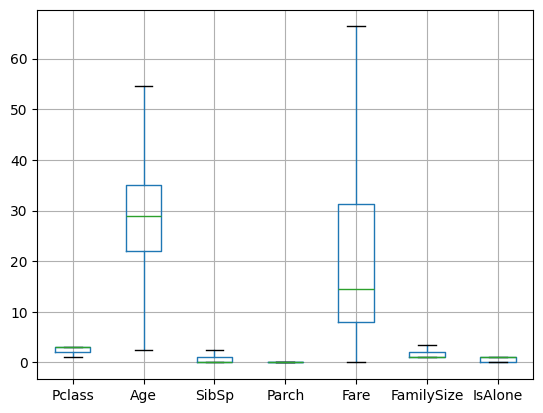

In [141]:
combined.boxplot()

In [142]:
combined['Sex'] = combined['Sex'].map({'male':0, 'female':1}).astype(int)

In [143]:
combined = combined.drop(columns=['Name', 'Ticket', 'Cabin'], errors='ignore')


In [144]:
combined = pd.get_dummies(combined, columns=['Embarked','Title','Pclass'], drop_first=True).astype(int)

In [145]:
combined.head()

,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Pclass_2.0,Pclass_3.0
PassengerId,,,,,,,,,,,,,,,
1,0,22,1,0,7,2,0,0,1,0,1,0,0,0,1
2,1,38,1,0,66,2,0,0,0,0,0,1,0,0,0
3,1,26,0,0,7,1,1,0,1,1,0,0,0,0,1
4,1,35,1,0,53,2,0,0,1,0,0,1,0,0,0
5,0,35,0,0,8,1,1,0,1,0,1,0,0,0,1


<Axes: xlabel='Age', ylabel='Count'>

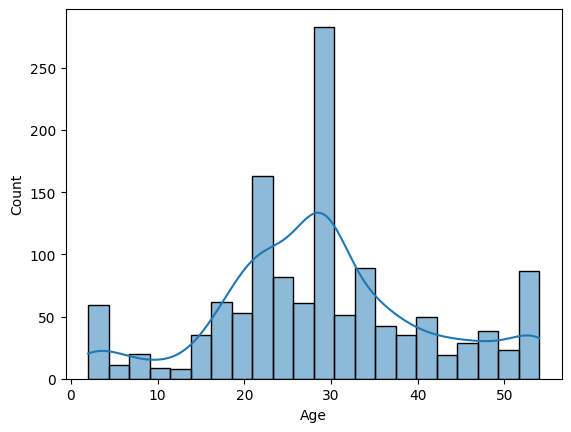

In [146]:
import seaborn as sns
sns.histplot(combined['Age'],kde=True)

In [147]:
combined.columns

Index(['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone',
       'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Rare', 'Pclass_2.0', 'Pclass_3.0'],
      dtype='object')

In [148]:
X_train = combined.loc[train_features.index].copy()
X_test  = combined.loc[test.index].copy()

In [149]:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [150]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [151]:
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y)

LogisticRegression(max_iter=1000, random_state=42)

In [152]:
y_pred = lr.predict(X_test_scaled)
y_proba = lr.predict_proba(X_test_scaled)[:,1]

In [153]:
print("X_test type/shape:", type(X_test), getattr(X_test, "shape", None))
print("y_pred type/shape:", type(y_pred), getattr(y_pred, "shape", None))
# If you have true labels in test:
print("test columns:", test.columns)


X_test type/shape: <class 'pandas.core.frame.DataFrame'> (418, 15)
y_pred type/shape: <class 'numpy.ndarray'> (418,)
test columns: Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')


In [154]:
train_acc = accuracy_score(y, lr.predict(X_train_scaled))
print("Training accuracy:", train_acc)

Training accuracy: 0.8260381593714927


In [155]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    lr,
    X_train_scaled, y, cv=5, scoring='accuracy'
)
print("Cross-validation accuracies:", scores)
print("Mean CV accuracy:", scores.mean())


Cross-validation accuracies: [0.79329609 0.80898876 0.80898876 0.7752809  0.86516854]
Mean CV accuracy: 0.810344611135522


In [156]:
y_train_pred = lr.predict(X_train_scaled)
y_train_proba = lr.predict_proba(X_train_scaled)[:, 1]

In [157]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
acc = accuracy_score(y, y_train_pred)
prec = precision_score(y, y_train_pred)
rec = recall_score(y, y_train_pred)
f1 = f1_score(y, y_train_pred)
roc_auc = roc_auc_score(y, y_train_proba)

In [158]:
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-Score:  {f1:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")

Accuracy:  0.8260
Precision: 0.7950
Recall:    0.7368
F1-Score:  0.7648
ROC AUC:   0.8718


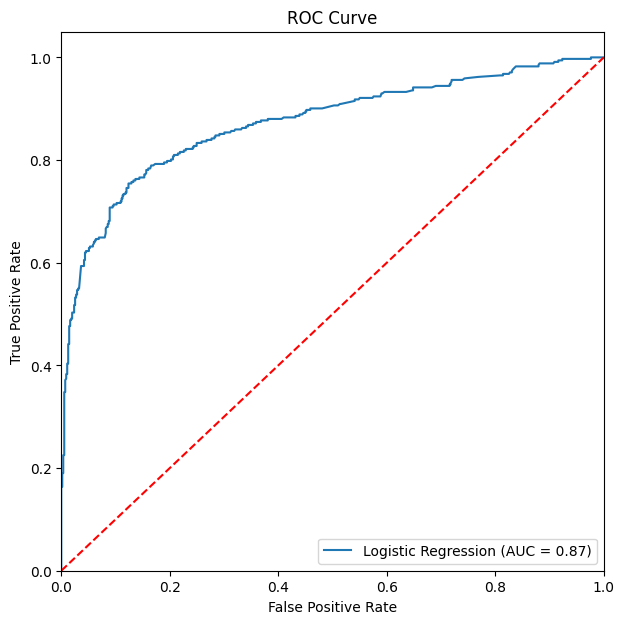

In [159]:
fpr, tpr, thresholds = roc_curve(y, y_train_proba)
plt.figure(figsize=(7, 7))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [160]:
coefs = lr.coef_
coefs

array([[ 0.79821809, -0.36775276, -0.37457797,  0.        ,  0.13529355,
        -0.29590585, -0.19972961, -0.02461497, -0.2247156 , -0.59160445,
        -1.25706515, -0.24371803, -0.36799954, -0.37816834, -1.0586956 ]])

In [161]:
X_train.columns

Index(['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone',
       'Embarked_Q', 'Embarked_S', 'Title_Miss', 'Title_Mr', 'Title_Mrs',
       'Title_Rare', 'Pclass_2.0', 'Pclass_3.0'],
      dtype='object')

## **Interpretation on Survival Odds**

* **Sex	+0.71**	Being female  significantly increases the survival odds.
* **Age	−0.37**	Being older decreases the survival odds.
* **SibSp	−0.43**	Having more siblings or spouses aboard decreases the survival odds.
* **Parch	−0.15**	Having parents or children aboard slightly decreases the survival odds.
* **Fare	+0.16**	Paying a higher fare increases the survival odds.
* **FamilySize	−0.37**	Larger family size decreases the survival odds
* **IsAlone	−0.20**	Being alone slightly decreases the survival odds.
* **Embarked_Q = -0.02**
Boarding at Queenstown has almost no effect.
* **Embarked_S = -0.16**
Boarding at Southampton slightly decreases survival odds compared to Cherbourg
* **Title_Miss = -0.70**
Being “Miss” decreases survival odds compared to the baseline title.
* **Title_Mrs = -0.35**
Married women had moderately lower odds compared to the baseline.
* **Title_Mr = -1.53**
Being “Mr” strongly decreases survival odds.
* **Title_Rare = -0.45**
Rare titles reduced odds
* **Pclass_2 = -0.41**
Traveling in 2nd class decreased odds compared to 1st class.
* **Pclass_3 = -1.03**
Traveling in 3rd class drastically reduced odds compared to 1st class.

## **Interview Questions**

### **What is the difference between precision and recall**

* **Precision**= TP/TP+FP​

Out of all the positives your model predicted, how many were actually correct?

It’s about being right when you say YES.

* **Recall**=TP/ TP+FN

Out of all the actual positives, how many did your model catch?

It’s about not missing positives.

* High Precision, Low Recall
* High Recall, Low Precision

### **What is cross-validation, and why is it important in binary classification?**

Cross-validation is a statistical method used to estimate how accurately a predictive model will perform in practice on new, unseen data. It is a way to test the model's performance without having to hold back a large, single test set that might not be representative of the entire population.

In [162]:
import pickle
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(lr, file)